In [1]:
import re
import json
import pandas as pd
import io
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../past_dataa/prices_round_3_day_0.csv", delimiter=';')


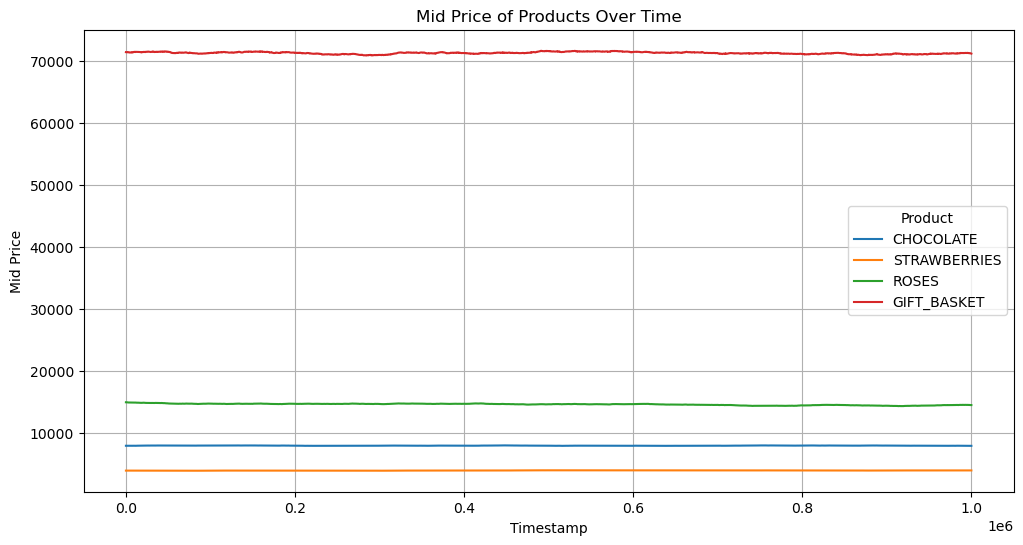

In [5]:
# Filter data for the specified products
products_to_plot = ['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET']
filtered_data = data[data['product'].isin(products_to_plot)]

# Pivot the data to have timestamps as rows and products as columns with mid_price values
pivot_data = filtered_data.pivot(index='timestamp', columns='product', values='mid_price')

# Plotting
plt.figure(figsize=(12, 6))
for product in products_to_plot:
    plt.plot(pivot_data.index, pivot_data[product], label=product)

plt.title('Mid Price of Products Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.legend(title='Product')
plt.grid(True)
plt.show()

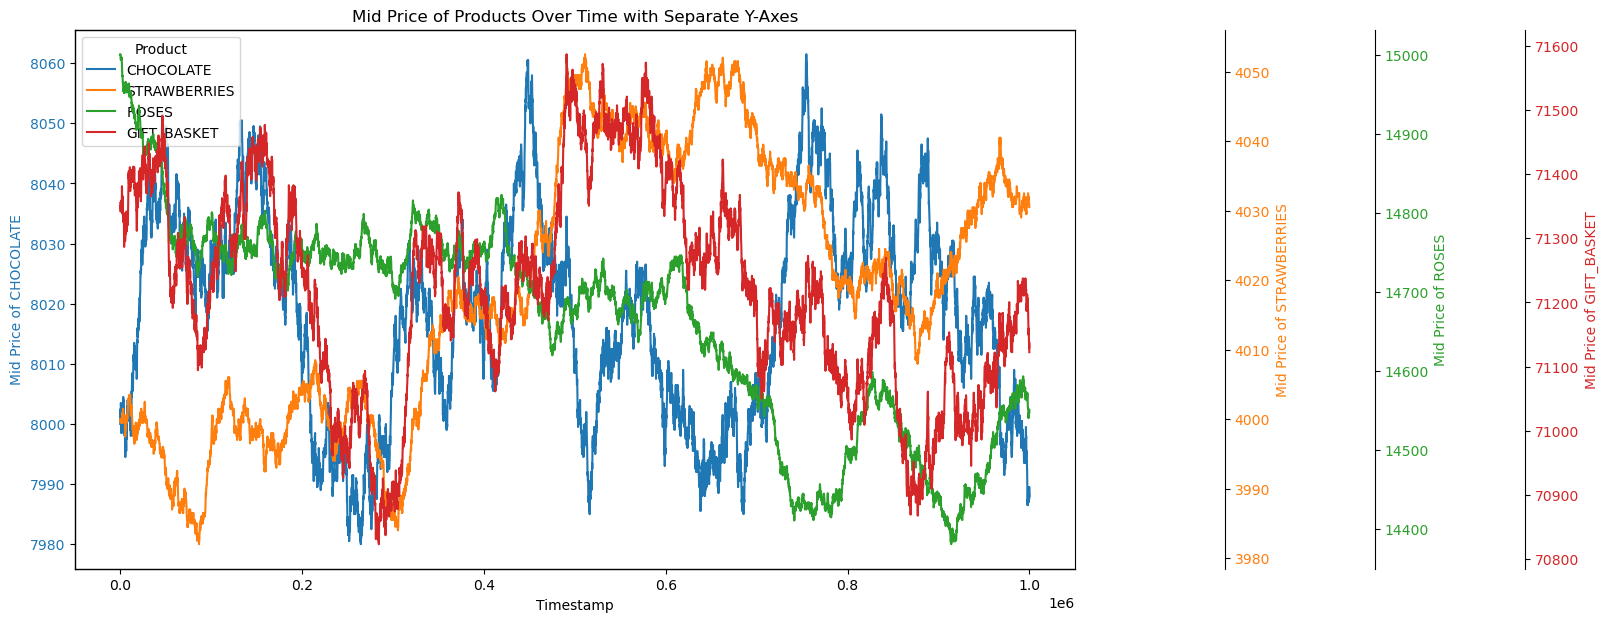

In [8]:
# Create a plot with separate y-axes
fig, ax1 = plt.subplots(figsize=(16, 7))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
axes = [ax1] + [ax1.twinx() for _ in range(len(products_to_plot) - 1)]  # Create additional axes for the other products
fig.subplots_adjust(right=0.75)

# Set positions for the additional y-axes
for i, ax in enumerate(axes[1:], start=1):
    ax.spines['right'].set_position(('axes', 1 + 0.15 * i))

# Plot each product on its own y-axis
for ax, color, product in zip(axes, colors, products_to_plot):
    ax.plot(pivot_data.index, pivot_data[product], color=color, label=product)
    ax.set_ylabel(f'Mid Price of {product}', color=color)
    ax.tick_params(axis='y', labelcolor=color)

# Set common labels and title
ax1.set_xlabel('Timestamp')
plt.title('Mid Price of Products Over Time with Separate Y-Axes')
lines, labels = [], []
for ax in axes:
    line, label = ax.get_legend_handles_labels()
    lines.extend(line)
    labels.extend(label)
ax1.legend(lines, labels, loc='upper left', title='Product')

plt.show()
